In [2]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pyaudio

import time

In [3]:
audio = pyaudio.PyAudio()

In [4]:
audio.get_device_count()

5

In [5]:
for ii in range(audio.get_device_count()):
    print(audio.get_device_info_by_index(ii))

{'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'defaultHighInputLatency': 0.18, 'defaultLowInputLatency': 0.09, 'index': 0, 'maxOutputChannels': 0, 'defaultSampleRate': 44100.0, 'defaultHighOutputLatency': 0.18, 'defaultLowOutputLatency': 0.09, 'structVersion': 2, 'maxInputChannels': 2}
{'name': 'Microphone (2- Logitech Mic (Co', 'hostApi': 0, 'defaultHighInputLatency': 0.18, 'defaultLowInputLatency': 0.09, 'index': 1, 'maxOutputChannels': 0, 'defaultSampleRate': 44100.0, 'defaultHighOutputLatency': 0.18, 'defaultLowOutputLatency': 0.09, 'structVersion': 2, 'maxInputChannels': 2}
{'name': 'Microsoft Sound Mapper - Output', 'hostApi': 0, 'defaultHighInputLatency': 0.18, 'defaultLowInputLatency': 0.09, 'index': 2, 'maxOutputChannels': 2, 'defaultSampleRate': 44100.0, 'defaultHighOutputLatency': 0.18, 'defaultLowOutputLatency': 0.09, 'structVersion': 2, 'maxInputChannels': 0}
{'name': 'Speakers (High Definition Audio', 'hostApi': 0, 'defaultHighInputLatency': 0.18, 'defaultLowIn

<IPython.core.display.Javascript object>


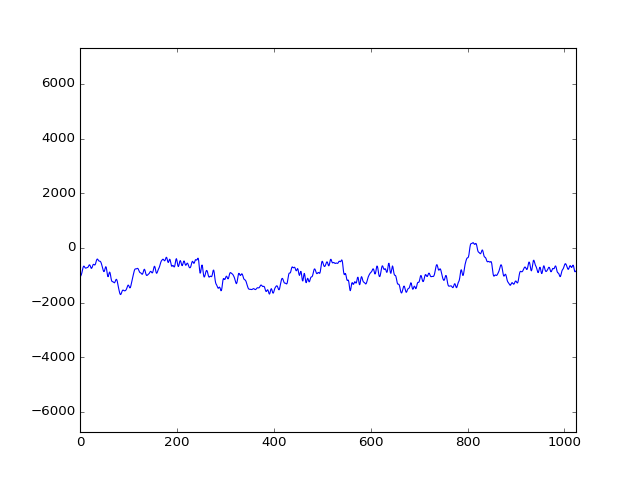

recording...
finished recording


In [8]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
 
audio = pyaudio.PyAudio()

fig, ax = plt.subplots(1, 1)
dz = np.zeros(CHANNELS*CHUNK, dtype=np.int16)
h, = ax.plot(dz)

ax.set_xlim(0, CHANNELS*CHUNK)
ymin = -2000
ymax = 500
ax.set_ylim(ymin, ymax)

# start Recording
stream = audio.open(format=FORMAT, 
                    input_device_index=1,
                    channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
print("recording...")

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    data_to_plot = np.fromstring(data, dtype=np.int16)
    cmin = min(data_to_plot)
    cmax = max(data_to_plot)
    ymin = min([ymin, cmin])
    ymax = max([ymax, cmax])
    ax.set_ylim(ymin, ymax)
    h.set_ydata(data_to_plot)
    fig.canvas.draw()
    
# close stream
stream.stop_stream()
stream.close()
audio.terminate()
print("finished recording")